## Wykorzystanie analizy skupień do oceny rozwoju społeczno-ekonomicznego państw Unii Europejskiej

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

## Wczytanie danych, statystyki opisowe

In [187]:
data = pd.read_csv('Dane_HDI.csv', sep=";", header=0)
data = data.set_index('Country')
data.iloc[:,].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,79.457143,11.660714,33083.714286,26.100000,18.039286,6.442857,52.471429,79.017857,51.532143,12.996429,11.075000,27.142857
std,2.926055,0.966605,10714.241419,9.888227,23.194194,1.862581,5.316282,11.373721,5.307022,5.416195,4.488555,7.176114
min,73.500000,8.900000,16261.000000,10.100000,0.400000,3.300000,38.800000,55.800000,38.800000,4.600000,3.000000,14.000000
25%,77.375000,11.200000,25706.500000,19.375000,3.875000,4.975000,49.475000,71.000000,48.500000,9.275000,8.475000,22.975000
50%,80.750000,11.800000,29479.500000,25.250000,9.150000,6.350000,52.850000,79.650000,52.250000,13.150000,10.350000,26.900000
75%,81.300000,12.300000,41834.500000,35.200000,17.550000,7.750000,56.500000,87.800000,54.775000,15.225000,13.575000,29.600000
max,83.300000,13.300000,62471.000000,43.600000,80.700000,10.000000,59.900000,97.300000,60.900000,30.200000,25.000000,44.400000


## Wypisanie danych

In [188]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
Country,,,,,,,,,,,,
Austria,81.6,11.3,43609,30.3,8.5,8.7,56.8,83.9,54.7,10.7,12.4,42.2
Belgium,81.0,11.4,41243,42.4,11.3,8.2,48.9,85.1,48.2,13.2,13.4,23.0
Bulgaria,74.3,10.8,16261,20.4,7.1,4.6,48.9,56.7,48.6,15.1,25.0,16.1
Croatia,77.5,11.2,20291,15.2,4.2,6.4,43.9,69.8,46.4,7.0,3.0,25.6
Cyprus,80.3,11.7,29459,12.5,1.2,3.3,53.9,71.7,57.5,9.2,9.8,28.2
Czech Republic,78.8,12.3,28144,19.6,10.5,6.3,56.4,81.3,51.1,13.5,11.7,29.6
Denmark,80.4,12.7,44519,37.4,5.7,9.2,58.1,96.3,58.0,6.8,8.4,44.4
Estonia,77.0,12.5,26362,23.8,1.3,5.0,58.2,88.4,55.4,9.9,9.2,26.6
Finland,81.0,11.2,38868,41.5,5.5,7.3,52.9,92.7,55.0,7.2,6.5,40.8


## Zamiana danych na typ zmiennoprzecinkowy

In [189]:
data_col = data.columns[1:]
for i in data_col:
    data.loc[:,i] = data.loc[:,i].astype(float)

## Obliczenie współczynników zmienności

In [191]:
wsp_zm =[]
for i in range(data.shape[1]):
    wsp_zm.append(np.std(data.iloc[:,i])/np.mean(data.iloc[:,i]))

wsp_zm

[0.03616199937932266,
 0.0814004468820165,
 0.3180167776622344,
 0.3720324269679957,
 1.262591348366908,
 0.2838830292377688,
 0.09949196530547749,
 0.1413449105341988,
 0.10112896553570278,
 0.40923536888364753,
 0.3979841001112155,
 0.259619100919649]

## Usunięcie zmiennych o najmniejszym wsp. zmienności

In [193]:
dane_n = data.iloc[:,[2,3,4,5,6,7,8,9,10,11]]

## Wypisanie macierzy korelacji

In [194]:
dane_n.iloc[:,].corr()

,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
X3,1.000000,0.616418,0.166371,0.641737,0.458486,0.789821,0.405529,-0.128558,0.158289,0.421783
X4,0.616418,1.000000,0.267281,0.719782,0.253989,0.549869,0.449043,-0.224871,0.104543,0.315581
X5,0.166371,0.267281,1.000000,0.352317,-0.065725,0.053193,-0.069522,0.141186,0.343516,-0.285449
X6,0.641737,0.719782,0.352317,1.000000,0.296140,0.612046,0.271130,-0.088941,0.237986,0.317965
X7,0.458486,0.253989,-0.065725,0.296140,1.000000,0.625455,0.781295,-0.244936,0.069534,0.598214
X8,0.789821,0.549869,0.053193,0.612046,0.625455,1.000000,0.585453,-0.243647,-0.046879,0.553342
X9,0.405529,0.449043,-0.069522,0.271130,0.781295,0.585453,1.000000,-0.534409,-0.042396,0.512468
X10,-0.128558,-0.224871,0.141186,-0.088941,-0.244936,-0.243647,-0.534409,1.000000,0.220809,-0.396417
X11,0.158289,0.104543,0.343516,0.237986,0.069534,-0.046879,-0.042396,0.220809,1.000000,-0.424570
X12,0.421783,0.315581,-0.285449,0.317965,0.598214,0.553342,0.512468,-0.396417,-0.424570,1.000000


## Usunięcie zmiennych z najmniejszym wsp. korelacji i ponowne wypisanie macierzy

In [195]:
dane_n = data.iloc[:,[2,3,5,6,7,8,11]]
dane_n.iloc[:,].corr()

,X3,X4,X6,X7,X8,X9,X12
X3,1.000000,0.616418,0.641737,0.458486,0.789821,0.405529,0.421783
X4,0.616418,1.000000,0.719782,0.253989,0.549869,0.449043,0.315581
X6,0.641737,0.719782,1.000000,0.296140,0.612046,0.271130,0.317965
X7,0.458486,0.253989,0.296140,1.000000,0.625455,0.781295,0.598214
X8,0.789821,0.549869,0.612046,0.625455,1.000000,0.585453,0.553342
X9,0.405529,0.449043,0.271130,0.781295,0.585453,1.000000,0.512468
X12,0.421783,0.315581,0.317965,0.598214,0.553342,0.512468,1.000000


## Standaryzacja danych

In [197]:
dane_norm = (dane_n-dane_n.mean())/dane_n.std()
dane_norm

,X3,X4,X6,X7,X8,X9,X12
Country,,,,,,,
Austria,0.982364,0.424748,1.211836,0.814210,0.429248,0.596918,2.098231
Belgium,0.761536,1.648425,0.943392,-0.671791,0.534754,-0.627874,-0.577312
Bulgaria,-1.570126,-0.576443,-0.989411,-0.671791,-1.962230,-0.552502,-1.538835
Croatia,-1.193992,-1.102321,-0.023010,-1.612297,-0.810452,-0.967048,-0.214999
Cyprus,-0.338308,-1.375373,-1.687367,0.268716,-0.643400,1.124521,0.147314
Czech Republic,-0.461042,-0.657347,-0.076699,0.738970,0.200651,-0.081429,0.342406
Denmark,1.067298,1.142773,1.480281,1.058742,1.519480,1.218736,2.404803
Estonia,-0.627363,-0.232600,-0.774655,1.077552,0.824897,0.728819,-0.075648
Finland,0.539869,1.557408,0.460191,0.080615,1.202961,0.653447,1.903139


## Dendrogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [13.75, 13.75, 53.75, 53.75],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [90.0, 90.0, 121.25, 121.25],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [230.0, 230.0, 253.75, 253.75],
  [200.0, 200.0, 241.875, 241.875],
  [162.5, 162.5, 220.9375, 220.9375],
  [105.625, 105.625, 191.71875, 191.71875],
  [33.75, 33.75, 148.671875, 148.671875]],
 'dcoord': [[0.0, 1.5244289779290108, 1.5244289779290108, 0.0],
  [0.0, 1.8580675859732259, 1.8580675859732259, 1.5244289

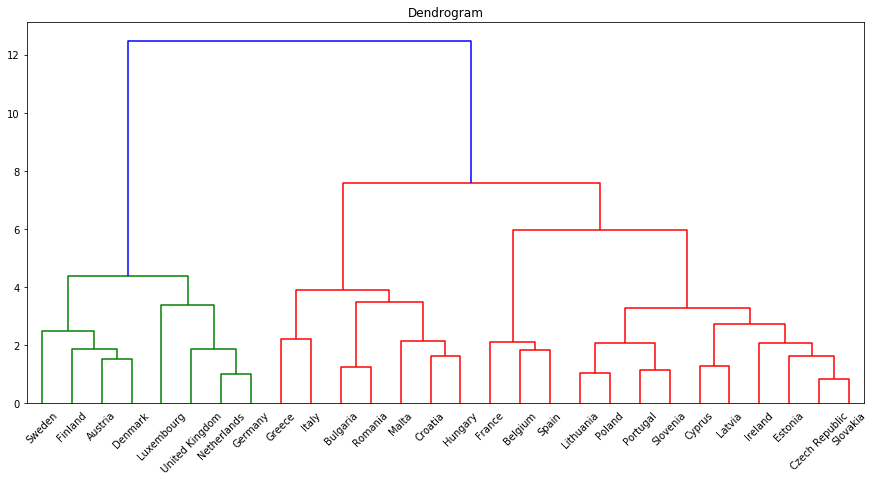

In [198]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(dane_norm, method='ward'), labels=list(dane_norm.index))
dend

## Wykres rozrzutu

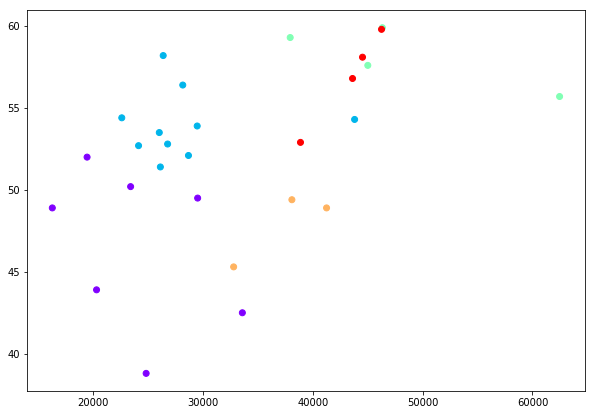

In [204]:
clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
clustering.fit_predict(dane_norm)

plt.figure(figsize=(10,7))
plt.scatter(dane_n.iloc[:,0], dane_n.iloc[:,3], c=clustering.labels_, cmap='rainbow')